Para começar, importamos algumas bibliotecas iniciais para ler e visualizar os dados.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Para ler os dados, utilizamos a função de ler arquivos .csv da biblioteca Pandas.
Com o dataset armazenado na variável df, olharemos as 5 primeiras linhas com .head().

In [2]:
df = pd.read_csv("spotify_song_classification.csv")

In [3]:
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


Observa-se uma coluna "Unnamed: 0" que não é necessária para o dataset.
Utilizando o método .drop retiramos essa coluna. Nos parâmetros, "axis = 1" significa que estamos escolhendo a dimensão
das colunas (o axis das linhas é 0). Já para o "inplace", caso deixassemos em False (por padrão), a mudança não seria efetivada no próprio DataFrame e precisaríamos reatribuir para alguma variável

In [4]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

Para conhecermos melhor nossos dados, podemos utilizar os métodos .info() e .describe().
Podemos ver as colunas, o número de observações ou linhas que cada uma possui e seus datatypes com .info().
Para dados mais estatísticos de cada coluna usa-se o .describe().

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(4), object(2)
memory usage: 252.2+ KB


In [6]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


Pode-se observar que em "time_signature" (compasso da música), o valor mínimo é 1, o que não é algo comum para descrever o compasso de uma música inteira. Para verificar isso, podemos buscar por uma condição.
Queremos buscar por df onde a coluna "time_signature" é igual a 1.

In [7]:
df[df["time_signature"] == 1]

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
1950,0.707,0.433,281253,0.364,0.000004,4,0.171,-8.842,1,0.0293,98.981,1.0,0.0384,0,"My Heart Will Go On (Love Theme from ""Titanic"")",Céline Dion


Verificamos que isso só ocorre em uma única observação, na linha de índice 1950 referente à música "My Heart Will Go On". Podemos mudar esse valor de 1 para 4, indicando que a música tem na verdade um compasso de 4/4.
Uilizando o método .loc[índice, coluna], podemos localizar um valor em específico e reatribuir seu valor para 4.

In [8]:
df.loc[1950, "time_signature"] = 4

A coluna "target" é a que desejamos que nosso modelo preveja o valor. Ela assume o valor de 1 caso o usuário tenha gostado da música e 0 caso não tenha gostado. Só para conhecermos melhor nossos dados, podemos utilizar o método .value_counts() que nos retorna a contagem total de todos os valores que a coluna possui.

In [9]:
df["target"].value_counts()

1    1020
0     997
Name: target, dtype: int64

Podemos fazer algumas visualizações para entender melhor o dataset. Para isso, utilizaremos das bibliotecas matplotlib e seaborn.

Usando a função .lmplot do seaborn, conseguimos visualizar a relação entre "energy" e "danceability", coloridos de acordo se o usuário gostou da música ou não com o parâmetro hue.

Pode-se observar um grande número de pontos vermelhos (usuário não gostou) nas músicas com valores baixos de "energy" e "danceability".

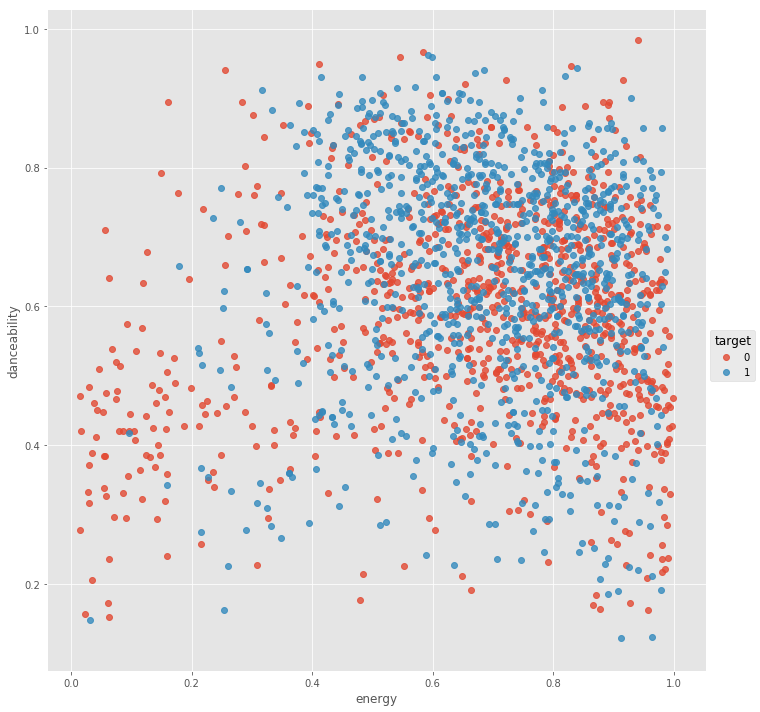

In [10]:
plt.style.use("ggplot")
sns.lmplot(x = "energy", y = "danceability", data = df, hue = "target", fit_reg = False, size = 10)

Uma visualização interessante é em relação ao tom das músicas. A coluna "key" possui valores de 0 a 11, equivalentes às notas musicais começando de C (Dó) até o B (Si). Criando um gráfico de contagem da coluna "target" separada por notas, podemos ver que há um pequeno número de músicas em D# (Ré sustenido), e dentre elas poucas pessoas gostaram da música. Há também diferenças razoáveis entre as avaliações de músicas nos tons C# e D, enquanto nas outras há um equilíbrio maior.

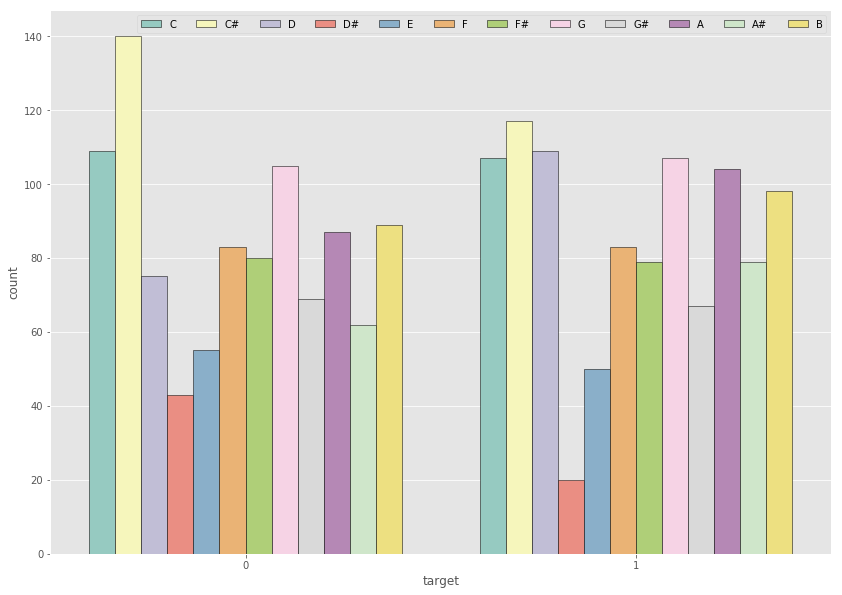

In [11]:
plt.figure(figsize = (14, 10))
sns.countplot(x = "target", data = df, edgecolor = "black", palette = "Set3", hue = "key")
notas = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
plt.legend(loc = "upper right", labels = notas, ncol = 12)

Criando um gráfico de caixa para a coluna "speechiness", percebe-se que há alguns valores muito discrepantes, principalmente o ponto mais acima.
Podemos calcular o valor limite para verificação de outliers (valores muito discrepantes que prejudicam o dataset) utilizando da regra do 1.5(IQR):

    High Outliers -> Q3 + 1.5 * (IQR).
    Lembrando: IQR = Q3 - Q1
    
Esses valores podem ser facilmente encontrados utilizando métodos da biblioteca pandas.

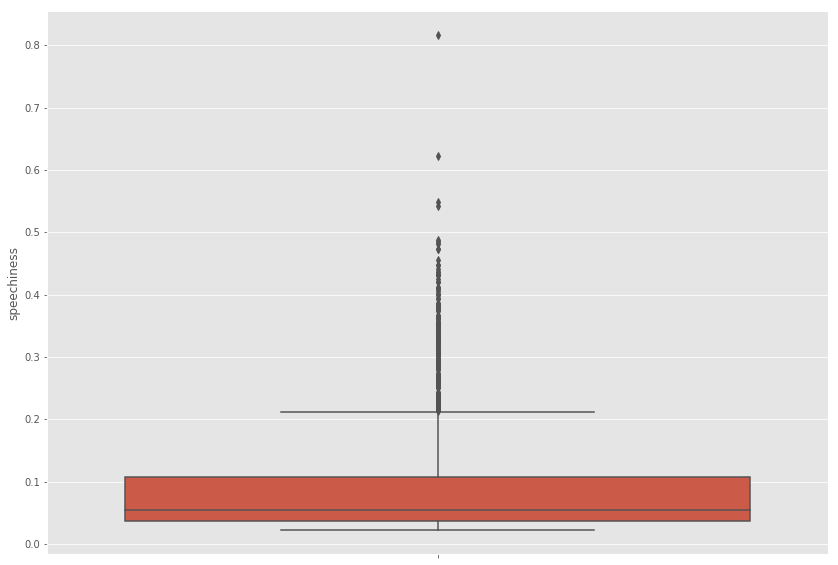

In [12]:
plt.figure(figsize = (14, 10))
sns.boxplot(y = "speechiness", data = df)

In [13]:
high_boundary = df["speechiness"].quantile(.75) + 1.5 * (df["speechiness"].quantile(.75) - df["speechiness"].quantile(.25))

In [14]:
high_boundary

0.21375000000000002

In [15]:
outliers = df[df["speechiness"] > high_boundary].index

In [16]:
outliers

Int64Index([   0,    2,    8,    9,   18,   22,   26,   35,   43,   44,
            ...
            1951, 1967, 1969, 1977, 1978, 1983, 1997, 2002, 2004, 2012],
           dtype='int64', length=209)

Observa-se que de acordo os resultados, o tamanho da lista "outliers" é de 209, ou seja, há 209 valores discrepantes ou high outliers. Em um dataset que já é relativamente pequeno, remover 209 valores pode fazer uma grande diferença. Podemos remover somente o valor mais discrepante representado pelo ponto mais alto no gráfico anterior.

In [17]:
outlier = df[df["speechiness"] == df["speechiness"].max()].index
df.drop(outlier, inplace = True)

Precisamos pensar em que colunas realmente queremos utilizar como 'features" ou que colunas usaremos como entrada para o modelo. O usuário normalmente não decide se gosta ou não da música baseado no seu nome, logo podemos ignorar a coluna "song_title", porém o nome do artista é importante.

In [18]:
df.drop("song_title", axis = 1, inplace = True)

A coluna "artist" possui strings, textos. Isso não é algo com que o modelo que criarmos consigra trabalhar. Desta forma, podemos utilizar uma biblioteca que possui uma função que dá um número para cada artista diferente. Assim, no lugar de texto teremos valores numéricos. Há duas formas de fazer esta transformação, e ambas são classes da biblioteca "sklearn" (scikit learn).

    OneHotEncoder -> Performa One Hot Encoding, que criaria uma coluna para cada artista diferente, cada coluna tomando valor 1 na linha referente a esse artista e 0 em todas as demais linhas.
    LabelEncoder -> Atribui um número diferente para cada artista, porém mantendo tudo em uma única coluna.
    
Como possuímos um número grande de artistas, criar uma coluna para cada um pode não ser uma ideia tão boa. Utilizaremos então o LabelEncoder. Criamos um objeto da classe e utilizamos o método .fit_transform, quefaz com que o objeto aprenda os artistas e atribua um número para cada um. Após isso, reatribuímos a coluna "artist" do nosso dataset para essa nova coluna com valores númericos.

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
artist_encoded = encoder.fit_transform(df["artist"])
df["artist"] = artist_encoded
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,628


Agora precisamos separar nossos dados em dados de treino e dados de teste. O modelo ira aprender a partir dos dados de treino e será avaliado a partir dos dados de teste.

Separaremos em X e y primeiramente, sendo X um DataFrame com todas as colunas que achamos ser úteis (neste caso todas, menos o nosso alvo) e y será a coluna "target". Após isso separamos em dados de treino e de teste utilizando da biblioteca sklearn. Usaremos 70% dos dados para treino e 30% para teste.

In [20]:
X = df.drop("target", axis = 1)

In [21]:
y = df["target"]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

Feito isso, precisamos normalizar os dados. Não podemos ter valores numéricos em escalas variadas, pois isso fará com que o modelo entenda por exemplo que a nossa coluna "artist", que agora tem valores numéricos que vão até valores inteiros altos, valha mais que colunas como "energy", que tem valores numéricos entre 0 e 1. Colocando esses valores em uma mesma "escala", evitamos esse erro. Note que a partir de agora, visualmente os valores não terão mais muito sentido para nós, mas terão para o modelo.

Utilizaremos a classe StandardScaler da biblioteca sklearn. Lembrando que faremos isso somente nos dados de entrada, ou seja, X. Fitaremos e transformaremos para X_train. Para X_test, como o modelo já está fitado para X_train, podemos só transformar diretamente.

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Como modelo de predição, podemos utilizar um Support Vector Machine. Conseguimos isso com a biblioteca sklearn. Criamos um modelo a partir de uma instância da classe que importamos. Esse modelo é então fitado, ou seja, treina a partir dos nossos dados de entrada X_train e nossos resultados conhecidos y_train. Após o modelo estar treinado, podemos realizar predições no nossos dados de teste X_test.

In [24]:
from sklearn.svm import SVC

In [35]:
model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

Com nossas predições feitas, avaliamos o modelo comparando as predições com os resultados que esperávamos y_test. Tiraremos disso uma acurácia, uma porcentagem de acerto do modelo. Para isso, importamos um relatório de classificação, função da biblioteca sklearn.

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.72      0.76      0.74       310
          1       0.73      0.69      0.71       295

avg / total       0.73      0.73      0.73       605



Podemos observar uma precisão média de 73%, o que é um bom resultado para esse dataset.

Podemos testar com uma Floresta Aleatória ou Random Forest e ver que resultados conseguimos obter. Vale observar que estipulando o número de estimadores para 5000 pode fazer com que o processo leve um tempo razoável.

In [54]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=20000)
forest.fit(X_train, y_train)
preds = forest.predict(X_test)
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.80      0.76      0.78       310
          1       0.76      0.80      0.78       295

avg / total       0.78      0.78      0.78       605



Conseguimos melhorar nossos resultados para 78%. Isso foi só um exemplo, então pode ser que uma atenção maior na etapa de pré-processamento dos dados possa tornar nossos dados ainda melhores para os modelos desempenharem com mais precisão. Essa etapa é fundamental e é a parte que vai mais interferir nos resultados, afinal se os dados de entrada não forem bons, os dados de saída também não serão.